In [81]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 14, 'xtick.top': True, 'ytick.right': True, 'xtick.direction': 'in', 'ytick.direction': 'in'})

In [138]:
# Load the data 
# Time that the boiler is on, the minimum temperature before and the maximum temperature after heating

df = pd.read_csv("hot_water_data.csv")
df['duration'] = df['duration'] / 60.0 #convert seconds to minutes
df.head(10)

,duration,temp_before,temp_after
0,18.233333,21.00,34.75
1,13.850000,24.50,34.00
2,22.866667,20.00,33.00
3,13.900000,24.50,34.50
4,102.233333,30.75,39.50
5,17.866667,23.25,33.50
6,25.033333,20.00,31.25
7,16.000000,30.00,34.25
8,0.516667,28.75,34.50
9,66.450000,28.75,42.00


In [142]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.metrics import mean_squared_error#, r2_score
#from sklearn import feature_selection

('Coefficients: \n', array([0.29079318]), 29.90343800878932)
mean squared error 9.614920481796513


<IPython.core.display.Javascript object>


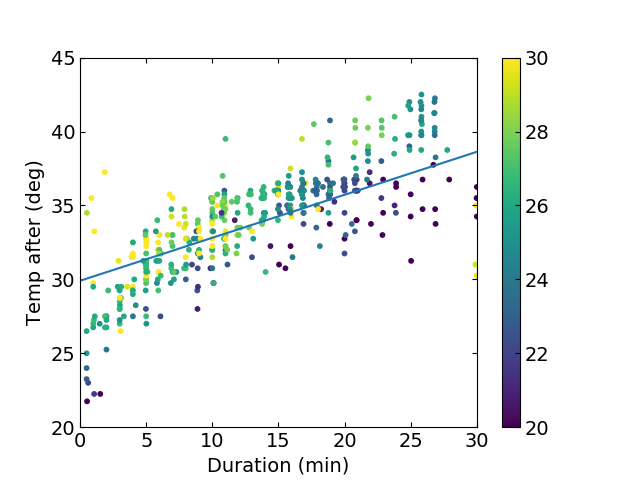

In [143]:
#linear regression model

model = linear_model.LinearRegression()
model.fit(df[['duration']], df['temp_after'])

x = np.linspace(0,30)
y = model.predict(x[:,None])

print('Coefficients: \n', model.coef_, model.intercept_)
print "mean squared error",  mean_squared_error(df['temp_after'], model.predict(df[['duration']]))

fig = plt.figure()
plt.scatter(df['duration'], df['temp_after'], c=df['temp_before'], s=10 )
plt.plot(x, y)
plt.xlabel("Duration (min)")
plt.ylabel("Temp after (deg)")

plt.colorbar()

plt.xlim(0,30)
plt.ylim(20,45)
plt.clim(20,30)
plt.show()

('Coefficients: \n', array([ 0.52721238, -0.0045548 ]), 27.880490681404147)


<IPython.core.display.Javascript object>


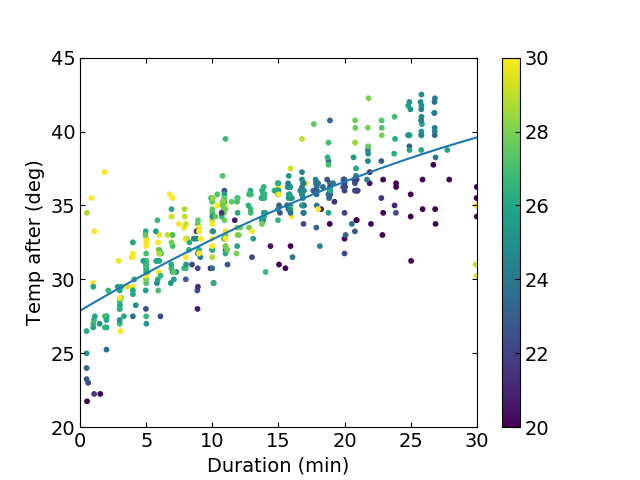

In [146]:
#linear regression model with x and x^2 stacked


x_new = np.hstack([df[['duration']] , df[['duration']]**2])
model = linear_model.LinearRegression()
model.fit(x_new, df['temp_after'])

print('Coefficients: \n', model.coef_, model.intercept_)

x = np.linspace(0,30, 40)[:,None]
x_new = np.hstack([x , x**2])
y = model.predict(x_new)


fig = plt.figure()
plt.scatter(df['duration'], df['temp_after'], c=df['temp_before'], s=10 )
plt.plot(x_new[:,0], y, '-')

plt.xlabel("Duration (min)")
plt.ylabel("Temp after (deg)")

plt.colorbar()

plt.xlim(0,30)
plt.ylim(20,45)
plt.clim(20,30)
plt.show()

('Coefficients: \n', array([ 0.        ,  0.52721238, -0.0045548 ]), 27.880490681404144)


<IPython.core.display.Javascript object>


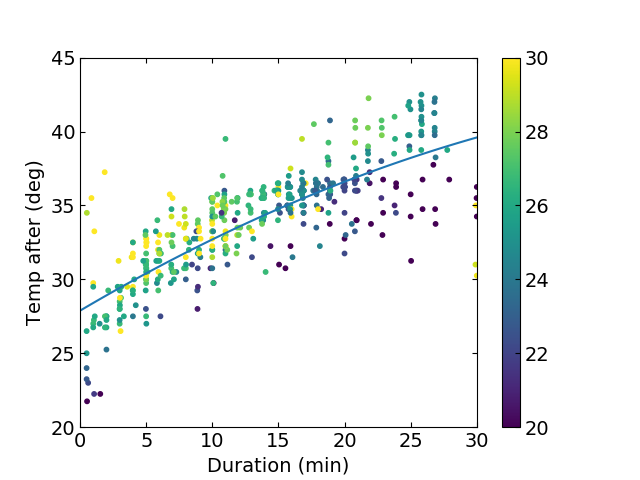

In [149]:
#linear regression model with preprocessing polynomial

x = np.linspace(0,30,100)[:,None]

#pre processing
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(df[['duration']])
Xpredict_ = poly.fit_transform(x)

# linear regression model
model = linear_model.LinearRegression()
model.fit(X_, df['temp_after'])
y = model.predict(Xpredict_)

print('Coefficients: \n', model.coef_, model.intercept_)


fig = plt.figure()
plt.scatter(df['duration'], df['temp_after'], c=df['temp_before'], s=10 )
plt.plot(x, y, '-')

plt.xlabel("Duration (min)")
plt.ylabel("Temp after (deg)")

plt.colorbar()

plt.xlim(0,30)
plt.ylim(20,45)
plt.clim(20,30)
plt.show()

('Coefficients: \n', array([ 0.        ,  0.52721238, -0.0045548 ]), 27.880490681404144)
mean squared error 7.385654341969433


<IPython.core.display.Javascript object>


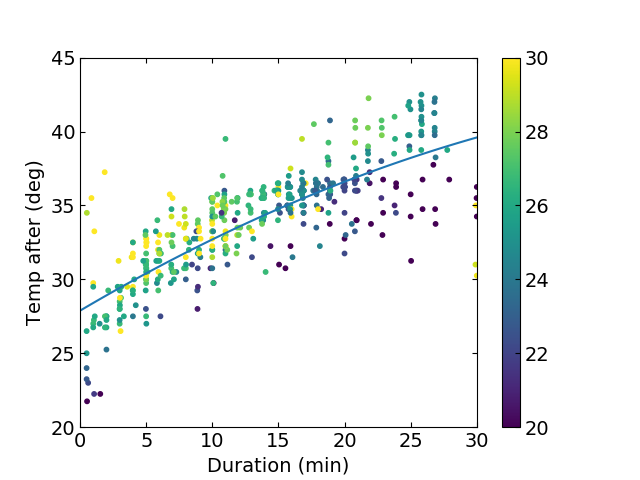

In [158]:
#linear regression model with polynomial pipeline

model = make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression())
model.fit(df[['duration']], df['temp_after'])

x = np.linspace(0,30,100)[:,None]
y = model.predict(x)

print('Coefficients: \n', model.steps[1][1].coef_, model.steps[1][1].intercept_)
print "mean squared error",  mean_squared_error(df['temp_after'], model.predict(df[['duration']]))


fig = plt.figure()
plt.scatter(df['duration'], df['temp_after'], c=df['temp_before'], s=10 )
plt.plot(x, y, '-')

plt.xlabel("Duration (min)")
plt.ylabel("Temp after (deg)")

plt.colorbar()

plt.xlim(0,30)
plt.ylim(20,45)
plt.clim(20,30)
plt.show()